# Linear Regression for Sales Prediction - Beginner Level Task 3

This notebook covers:
- Selecting relevant features (date, promotions, holidays).
- Spliting data into training and testing sets.
- Training a simple regression model.
- Evaluating model performance.
- Visualizing actual vs predicted sales trends.


In [40]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and Merge Datasets

# Load datasets
df_train = pd.read_csv('train.csv', parse_dates=['date'])
df_stores = pd.read_csv('stores.csv')
df_holidays = pd.read_csv('holidays_events.csv')

# Convert 'date' column in holidays dataset to datetime
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

# Merge datasets step-by-step
train = df_train.merge(df_stores, on='store_nbr', how='left')

# Before merging, rename 'type' in holidays
df_holidays = df_holidays.rename(columns={'type': 'holiday_type'})

# Merge with holidays
train = train.merge(df_holidays[['date', 'holiday_type']], on='date', how='left')

# Create holiday indicator column
train['is_holiday'] = train['holiday_type'].notnull().astype(int)

# Drop extra column
train.drop(columns=['holiday_type'], inplace=True)

train.head()

# We combined store, holiday, and training data into a single dataset for easier analysis.

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,is_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,1
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,1
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,1
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,1


#### Feature Engineering

In [29]:
# Extract time-based features
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['dayofweek'] = train['date'].dt.dayofweek
train['promo_weekend'] = train['onpromotion'] * ((train['dayofweek'] >= 5).astype(int))
train['holiday_month'] = train['is_holiday'] * train['month']

# Select input features and target variable
features = ['onpromotion', 'is_holiday', 'dayofweek', 'month', 'year', 'promo_weekend', 'holiday_month']
X = train[features]
y = train['sales']

# We extracted time-based features from the date column and chose relevant features for the regression model.

#### Split Data into Train and Test Sets


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We split the data into 80% for training and 20% for testing.

#### Build and Train Linear Regression Model

In [31]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# We trained a Linear Regression model to predict sales based on time and promotions.

#### Evaluate Model Performance

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

# These metrics help us measure how close our predictions are to actual sales.

Mean Absolute Error: 427.60733732378173
Root Mean Squared Error: 982.493368653085
R2 Score: 0.193088136803083


#### Visualize Actual vs Predicted Sales

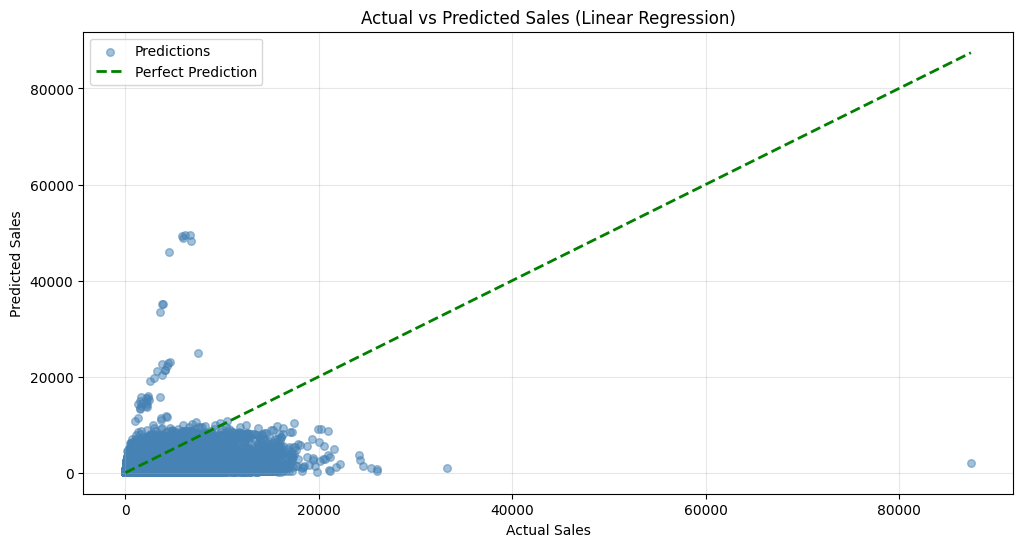

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='steelblue', s=30, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='green', linewidth=2, linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# We plotted a scatter graph to see how close the predicted values are to actual sales.

#### Learning Outcomes
- Gained hands-on experience with **Linear Regression** using Scikit-learn.
- Understood how to prepare and merge datasets for regression analysis.
- Learned how to evaluate regression models using key metrics.
- Visualized and compared **actual vs predicted** sales trends.

**Tech Stack:** Python, Pandas, NumPy, Scikit-learn, Matplotlib.
**Dataset:** [Store Sales Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-seriesforecasting)
